# Introduction

This program deals with Market Basket Analysis using a dataset and some operations will be performed on it to find insights and use the resultant data to find more inferences for future decision making and better sales opportunities.

Market Basket Analysis is a powerful technique that allows us to uncover patterns and associations between items that customers tend to purchase together. By analyzing these patterns, we can gain valuable insights that can drive business decisions and strategies.

In this notebook, we will work with a Market Basket dataset that captures customer transactions in a retail or e-commerce setting. The dataset provides a wealth of information about customer purchases, allowing us to dive deep into their buying behavior. By leveraging data mining techniques and association rule mining algorithms, we will unravel the relationships between items and discover interesting patterns.

Through this analysis, we can derive actionable insights to improve various aspects of business operations. We can identify frequently co-purchased items, enabling us to make targeted product recommendations and enhance cross-selling and upselling opportunities. By optimizing product placement and store layout based on association patterns, we can create more enticing shopping experiences. Furthermore, we can design effective promotional campaigns by leveraging the discovered item associations, resulting in higher customer engagement and increased sales.

# Overview of the Market Basket Analysis dataset

This dataset contains 522,065 rows and 7 attributes that provide valuable information about customer transactions and product details. Here is a breakdown of the attributes:

    BillNo: This attribute represents a 6-digit number assigned to each transaction. It serves as a unique identifier for identifying individual purchases.

    Itemname: This attribute stores the name of the product purchased in each transaction. It provides nominal data representing different products.

    Quantity: This attribute captures the quantity of each product purchased in a transaction. It is a numeric value that indicates the number of units of a specific item.

    Date: The Date attribute records the day and time when each transaction occurred. It provides valuable information about the timing of purchases.

    Price: This attribute represents the price of each product. It is a numeric value that indicates the cost of a single unit of the item.

    CustomerID: Each customer is assigned a 5-digit number as their unique identifier. This attribute helps track customer-specific information and analyze individual buying patterns.

    Country: The Country attribute denotes the name of the country where each customer resides. It provides nominal data representing different geographic regions.

By analyzing this dataset, we can gain insights into customer purchasing behavior, identify popular products, examine sales trends over time, and explore the impact of factors such as price and geography on customer preferences. These insights can be used to optimize marketing strategies, improve inventory management, and enhance customer satisfaction.

# Data Preprocessing

` Importing the data`

In [23]:
import numpy as np  # Import numpy library for efficient array operations
import pandas as pd  # Import pandas library for data processing
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for data visualization

` Loading the data`

In [24]:
df = pd.read_csv('market_data.csv', sep=';',parse_dates=['Date'], low_memory=False)
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [25]:
# Convert the 'Price' column to float64 data type after replacing commas with dots
df['Price'] = df['Price'].str.replace(',', '.').astype('float64')

` Display information about the dataset`

In [26]:
# Display the information about the DataFrame which is to provide an overview of the DataFrame's structure and column data types.
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
count,522064,520609,522064.000000,522064,522064.000000,388023.000000,522064
unique,21663,4185,NaN,19641,NaN,NaN,30
top,573585,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31.10.2011 14:41,NaN,NaN,United Kingdom
freq,1114,2269,NaN,1114,NaN,NaN,487622
mean,NaN,NaN,10.090435,NaN,3.826801,15316.931710,NaN
std,NaN,NaN,161.110525,NaN,41.900599,1721.846964,NaN
min,NaN,NaN,-9600.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,1.000000,NaN,1.250000,13950.000000,NaN
50%,NaN,NaN,3.000000,NaN,2.080000,15265.000000,NaN
75%,NaN,NaN,10.000000,NaN,4.130000,16837.000000,NaN


` Finding the number of missing values in each attribute`

In [27]:
# Calculate the number of missing values for each column and sort them in descending order
df.isna().sum().sort_values(ascending=False)

CustomerID    134041
Itemname        1455
BillNo             0
Quantity           0
Date               0
Price              0
Country            0
dtype: int64

` Calculate the Total Price value for data processing`

In [28]:
# Calculate the total price by multiplying the quantity and price columns
df['Total_Price'] = df.Quantity * df.Price

In [29]:
# Print the number of unique countries in the 'Country' column
print("Number of unique countries:", df['Country'].nunique())

# Calculate and print the normalized value counts of the top 5 countries in the 'Country' column
print(df['Country'].value_counts(normalize=True)[:5])

Number of unique countries: 30
Country
United Kingdom    0.934027
Germany           0.017320
France            0.016105
Spain             0.004760
Netherlands       0.004526
Name: proportion, dtype: float64


Considering that the majority of transactions (approximately 93%) in the dataset originate from the UK, the 'Country' column may not contribute significant diversity or variability to the analysis. Therefore, we can choose to remove the 'Country' column from the DataFrame df. we indicate that we want to drop a column, This step allows us to focus on other attributes that may provide more valuable insights for our analysis.

In [30]:
# Delete the 'Country' column from the DataFrame
df.drop('Country', axis=1, inplace=True)

In [31]:
# Filter the DataFrame to display rows where 'BillNo' column contains non-digit values
df[df['BillNo'].str.isdigit() == False]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
288772,A563185,Adjust bad debt,1,12.08.2011 14:50,11062.06,NaN,11062.06
288773,A563186,Adjust bad debt,1,12.08.2011 14:51,-11062.06,NaN,-11062.06
288774,A563187,Adjust bad debt,1,12.08.2011 14:52,-11062.06,NaN,-11062.06


Since the item name "Adjust bad debt" was filled accidentally and does not provide any useful information for our analysis, we can choose to remove the corresponding rows from the DataFrame. The code snippet above filters the DataFrame df to retain only the rows where the 'Itemname' column does not contain the value "Adjust bad debt". This operation effectively eliminates the rows associated with the accidental data entry, ensuring the dataset is free from this irrelevant item name.

In [32]:
# Remove rows where the 'Itemname' column contains "Adjust bad debt"
df = df[df['Itemname'] != "Adjust bad debt"]

In [33]:
# Here to check if all BillNo doesn't inculde letters 
df['BillNo'].astype("int64")

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
522059    581587
522060    581587
522061    581587
522062    581587
522063    581587
Name: BillNo, Length: 522061, dtype: int64

` Excluding rows where 'Itemname' attribute is missing`

In [34]:
# Filter the DataFrame to exclude rows where 'Itemname' is missing (not NaN)
df = df[df['Itemname'].notna()]

# Print the number of unique items in the 'Itemname' column
print("Number of unique items:", df['Itemname'].nunique())

# Calculate and print the normalized value counts of the top 5 items in the 'Itemname' column
print(df['Itemname'].value_counts(normalize=True)[:5])

Number of unique items: 4184
Itemname
WHITE HANGING HEART T-LIGHT HOLDER    0.004358
JUMBO BAG RED RETROSPOT               0.004009
REGENCY CAKESTAND 3 TIER              0.003707
PARTY BUNTING                         0.003221
LUNCH BAG RED RETROSPOT               0.003016
Name: proportion, dtype: float64


` Removing rows where 'Quantity' and 'Price' are zero`

In [35]:
# Remove rows where 'Quantity' is less than 1
df = df[df['Quantity'] >= 1]

# Remove rows where the price is zero
df = df[df['Price'] != 0]

# Data Understanding: Interpretation of the Dataset

In the data analysis process, data understanding plays a crucial role in gaining insights and formulating meaningful conclusions. By thoroughly examining the dataset, we aim to understand its structure, contents, and underlying patterns. This understanding empowers us to make informed decisions regarding data cleaning, feature engineering, and subsequent analysis steps.

Key aspects of data understanding include:

    Exploring the Dataset: We investigate the dataset's dimensions, such as the number of rows and columns, to gauge its size and complexity. Additionally, we examine the data types of each column to understand the nature of the variables.

    Assessing Data Quality: We scrutinize the data for inconsistencies, outliers, or other data quality issues that may require attention. Addressing these issues ensures the reliability and accuracy of the data.

    Identifying Relationships: We analyze the relationships between variables by examining correlations, associations, or dependencies. This analysis allows us to uncover meaningful connections that can drive insights and guide our analysis.

    Detecting Patterns and Trends: We look for recurring patterns, trends, or distributions within the data. This step can reveal valuable information about customer behavior, market dynamics, or other relevant factors.

By thoroughly understanding the dataset, we lay the foundation for meaningful data analysis and generate insights that contribute to informed decision-making and problem-solving.

` Sorting most sold products by quantity and count and plotting a graph`

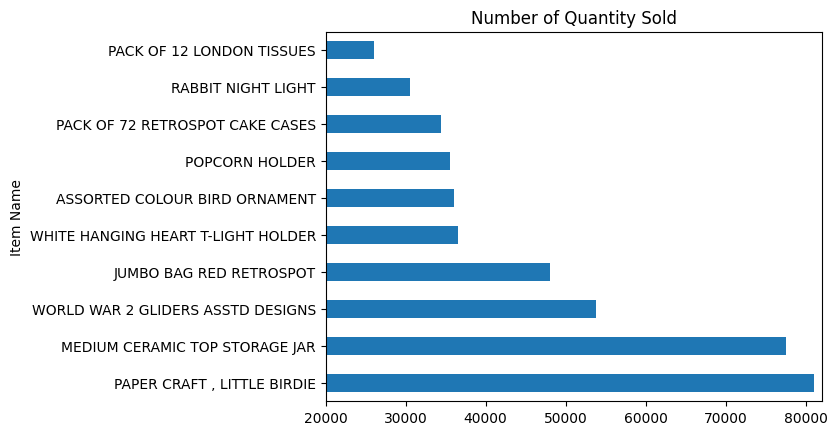

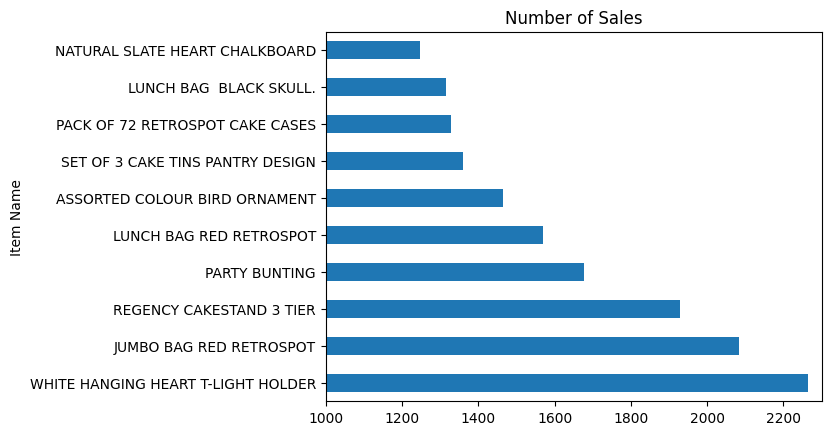

In [36]:
# Plotting the top 10 most sold products by quantity
df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()

# Plotting the top 10 most sold products by count
df['Itemname'].value_counts(ascending=False)[:10].plot(kind='barh', title='Number of Sales')
plt.ylabel('Item Name')
plt.xlim(1000, 2300)
plt.show()

# Assocation Rules using Apriori algorithm

Association rules are generated using the Apriori algorithm, which is a popular algorithm for discovering interesting relationships or associations among items in a dataset. Association rule mining is commonly used in market basket analysis, where the goal is to find associations between items frequently purchased together.

The association rules are evaluated based on different metrics, such as support, confidence, lift, leverage, and conviction. These metrics provide measures of the interestingness or strength of the rules. 

- Support measures the proportion of transactions in the dataset that contain both the antecedent and the consequent.
- Confidence measures the conditional probability of the consequent given the antecedent.
- Lift measures the ratio of observed support to expected support, indicating the strength of the association between the antecedent and the consequent.
- Leverage measures the difference between the observed support and the expected support, indicating the significance of the association.
- Conviction measures the ratio of the expected confidence to the observed confidence, indicating the degree of dependency between the antecedent and the consequent.

By examining the association rules, you can identify interesting relationships, co-occurrences, or patterns among items, which can be used for various purposes such as product recommendation, market segmentation, or inventory management.

To generate the association rules, we use the Apriori algorithm with a minimum support threshold of 0.05 (5%). This ensures that only itemsets with sufficient frequency in the dataset are considered.

In [37]:
# Assign the original DataFrame to df2
df2 = df

#### Filtering is done based on item occurrences:
        The frequency count of each unique item name in the 'Itemname' column is calculated and stored in item_counts.
        filtered_items is created by filtering item_counts to retain only item names that occur more than once.
        Rows in df2 are filtered to keep only those where the item name in the 'Itemname' column is present in the filtered_items list.
#### Filtering is done based on bill number occurrences:
        The frequency count of each unique bill number in the 'BillNo' column is calculated and stored in bill_counts.
        filtered_bills is created by filtering bill_counts to retain only bill numbers that occur more than once.
        Rows in df2 are filtered to keep only those where the bill number in the 'BillNo' column is present in the filtered_bills list.

After executing the code, the filtered DataFrame df2 will contain only the rows where both the item name and bill number occur more than once in the original df.

In [38]:
# Create a pivot table using the filtered DataFrame
pivot_table = pd.pivot_table(df2[['BillNo','Itemname']], index='BillNo', columns='Itemname', aggfunc=lambda x: True, fill_value=False)

The code creates a pivot table that represents the occurrence of items in bills. The pivot table provides a binary representation where each cell indicates whether a specific item appears in a particular bill. Here's how it works:

    The original DataFrame df2 contains information about bills and corresponding item names.
    By using the pd.pivot_table() function, we reshape the DataFrame to create a pivot table.
    The pivot table has 'BillNo' as the index and 'Itemname' as the columns, grouping the data based on these two columns.
    The goal is to determine whether a specific item appears in a particular bill.
    Each cell in the pivot table is filled with either True or False:
        If an item appears in a bill, the corresponding cell is marked as True.
        If an item does not appear in a bill, the corresponding cell is marked as False.
    This binary representation of item occurrence in bills allows us to easily analyze and identify patterns or associations between different items and bills.

The resulting pivot table provides a concise summary of the occurrence of items in bills, which can be used for various purposes such as market basket analysis, recommendation systems, or identifying frequent itemsets and association rules.

In [39]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Generate frequent itemsets with minimum support of 0.1 (10%)
frequent_itemsets = apriori(pivot_table, min_support=0.01,use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, "confidence", min_threshold = 0.5)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
rules

Frequent Itemsets:
       support                                           itemsets
0     0.015953                           (10 COLOUR SPACEBOY PEN)
1     0.012680                  (12 MESSAGE CARDS WITH ENVELOPES)
2     0.018049                    (12 PENCIL SMALL TUBE WOODLAND)
3     0.018407              (12 PENCILS SMALL TUBE RED RETROSPOT)
4     0.018049                      (12 PENCILS SMALL TUBE SKULL)
...        ...                                                ...
1943  0.011351  (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...
1944  0.011351  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
1945  0.010482  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
1946  0.010379  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
1947  0.010379  (WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...

[1948 rows x 2 columns]

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.021321,0.065395,0.011964,0.561151,8.580917,0.010570,2.129673,0.902709
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.040802,0.065395,0.022242,0.545113,8.335665,0.019573,2.054586,0.917468
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.021321,0.049443,0.014010,0.657074,13.289617,0.012955,2.771905,0.944900
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.021321,0.038808,0.010737,0.503597,12.976749,0.009910,1.936315,0.943046
4,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.021321,0.052510,0.014521,0.681055,12.969890,0.013401,2.970700,0.943004
...,...,...,...,...,...,...,...,...,...,...
913,"(CHARLOTTE BAG PINK POLKADOT, RED RETROSPOT CH...","(CHARLOTTE BAG SUKI DESIGN, WOODLAND CHARLOTTE...",0.016617,0.023111,0.010379,0.624615,27.027052,0.009995,2.602369,0.979273
914,"(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...","(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...",0.016771,0.020657,0.010379,0.618902,29.961619,0.010033,2.569797,0.983111
915,"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...","(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",0.020657,0.016771,0.010379,0.502475,29.961619,0.010033,1.976242,0.987012
916,"(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...","(CHARLOTTE BAG SUKI DESIGN, RED RETROSPOT CHAR...",0.020043,0.016975,0.010379,0.517857,30.506777,0.010039,2.038866,0.987003


The code uses the apriori algorithm and association rule mining techniques to analyze the occurrence of items in bills. Here's the overall idea:

    Frequent Itemsets Generation:
        The apriori algorithm is applied to the pivot_table created earlier, which represents the occurrence of items in bills.
        The algorithm identifies sets of items that frequently co-occur together in the bills.
        The minimum support threshold of 0.01 (1%) is set, meaning that an itemset must occur in at least 1% of the bills to be considered frequent.
        The resulting frequent itemsets represent combinations of items that are frequently observed together in bills.

    Association Rules Generation:
        Using the frequent itemsets, association rules are generated.
        Association rules capture relationships and patterns between items based on their co-occurrence in bills.
        The confidence metric is used to evaluate the strength of the rules. Confidence measures how often the consequent item(s) appear in bills when the antecedent item(s) are present.
        A minimum confidence threshold of 0.5 (50%) is set, meaning that only rules with a confidence greater than or equal to 0.5 will be considered significant.

By applying these techniques to the pivot_table, the code enables the discovery of frequent itemsets and the extraction of meaningful association rules, helping to uncover hidden patterns and relationships in the data.

In [40]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.010533,0.036098,0.010277,0.975728,27.030158,0.009897,39.712772,0.973255
348,"(SUKI SHOULDER BAG, JAM MAKING SET PRINTED)",(DOTCOM POSTAGE),0.011146,0.036098,0.010686,0.958716,26.558866,0.010284,23.347854,0.973195
431,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010737,0.011913,0.010226,0.952381,79.942775,0.010098,20.749821,0.998209
432,"(HERB MARKER PARSLEY, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.010737,0.011964,0.010226,0.952381,79.601140,0.010098,20.748747,0.998155
426,"(HERB MARKER THYME, HERB MARKER BASIL)",(HERB MARKER ROSEMARY),0.010533,0.011964,0.010021,0.951456,79.523857,0.009895,20.353533,0.997936
...,...,...,...,...,...,...,...,...,...,...
709,"(LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE)",(LUNCH BAG WOODLAND),0.027866,0.051283,0.013958,0.500917,9.767640,0.012529,1.900921,0.923351
817,"(RED RETROSPOT CHARLOTTE BAG, STRAWBERRY CHARL...","(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",0.024645,0.020043,0.012322,0.500000,24.946429,0.011828,1.959914,0.984169
101,(HAND WARMER RED LOVE HEART),(HAND WARMER SCOTTY DOG DESIGN),0.020145,0.027815,0.010073,0.500000,17.976103,0.009512,1.944371,0.963786
138,(JUMBO BAG WOODLAND ANIMALS),(JUMBO BAG PINK POLKADOT),0.043665,0.061918,0.021832,0.500000,8.075145,0.019129,1.876163,0.916168


In [41]:
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
136,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.061918,0.105379,0.041875,0.676301,6.417800,0.035351,2.763740,0.899904
92,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.051744,0.049749,0.037325,0.721344,14.499531,0.034751,3.410119,0.981836
93,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.049749,0.051744,0.037325,0.750257,14.499531,0.034751,3.796928,0.979776
149,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.060231,0.105379,0.036865,0.612054,5.808131,0.030518,2.306047,0.880884
147,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.059618,0.105379,0.034564,0.579760,5.501671,0.028281,2.128833,0.870111
...,...,...,...,...,...,...,...,...,...,...
304,"(PACK OF 72 RETROSPOT CAKE CASES, WOODLAND CHA...",(CHARLOTTE BAG PINK POLKADOT),0.014214,0.037683,0.010021,0.705036,18.709761,0.009486,3.262490,0.960200
879,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",(JUMBO BAG PINK POLKADOT),0.014010,0.061918,0.010021,0.715328,11.552761,0.009154,3.295312,0.926419
723,"(LUNCH BAG PINK POLKADOT, LUNCH BAG DOLLY GIRL...",(LUNCH BAG RED RETROSPOT),0.013345,0.078791,0.010021,0.750958,9.530976,0.008970,3.699007,0.907185
395,"(RECYCLING BAG RETROSPOT, JUMBO SHOPPER VINTAG...",(DOTCOM POSTAGE),0.013192,0.036098,0.010021,0.759690,21.045348,0.009545,4.011077,0.965216


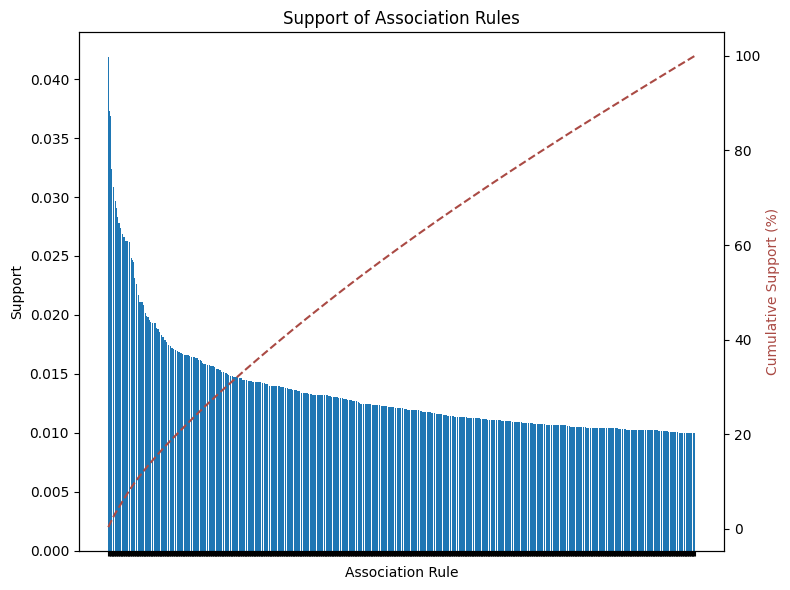

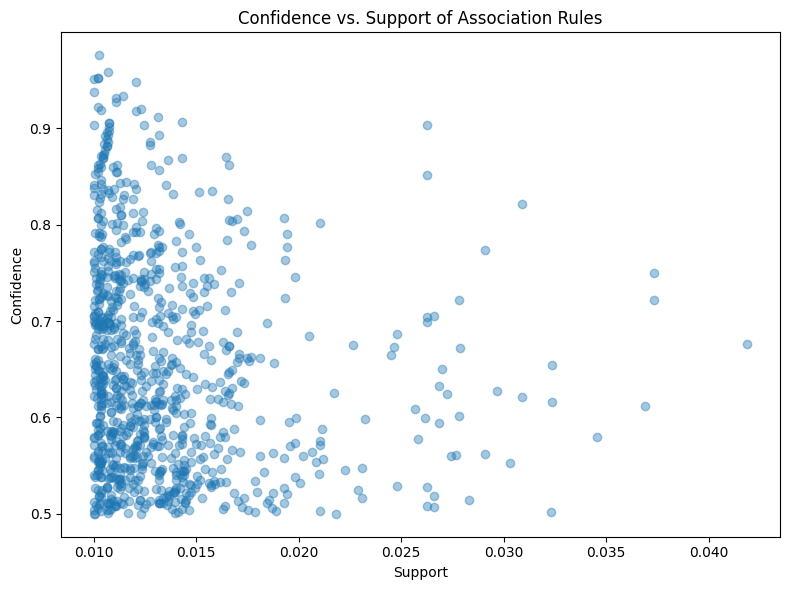

In [42]:
# Sort rules by support in descending order
sorted_rules = rules.sort_values(by='support', ascending=False)

# Calculate cumulative support
cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)

# Bar plot for Support
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center')
plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])  # Remove x-axis labels
ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Support')
ax1.set_title('Support of Association Rules')

# CDF plot for cumulative support
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_rules)), cumulative_support, color='#AA4A44', linestyle='--')
ax2.set_ylabel('Cumulative Support (%)', c='#AA4A44')

plt.tight_layout()
plt.show()

# Scatter plot for Confidence vs. Support
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

These two visualizations explore the association rules: a bar plot for the support of association rules and a scatter plot for the confidence vs. support of association rules.

The bar plot represents the support values of the association rules. Each bar corresponds to a rule, and its height represents the support value, indicating how frequently the rule occurs in the dataset. The y-axis represents the support, while the x-axis does not display any labels, focusing solely on the visualization of support values.

The cumulative distribution function (CDF) plot showcases the cumulative support of the association rules as a percentage. It helps understand the distribution of support values across the rules in a cumulative manner. The red dashed line in the CDF plot connects the cumulative support values for each rule, providing insights into the accumulation of support as the rules progress.

The scatter plot displays the relationship between confidence and support for the association rules. Each point represents a rule, with the x-axis representing the support and the y-axis representing the confidence. The plot shows how the confidence varies with different levels of support, helping identify any patterns or trends between these two metrics.

These visualizations offer valuable insights into the support, confidence, and their relationships within the association rules, aiding in the interpretation and analysis of the rules' strength and significance.

In [43]:
# Filter association rules for cross-selling opportunities
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(5)

# Filter association rules for upselling opportunities
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]

# Sort rules based on confidence and support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top upselling recommendations
top_upselling = upselling_rules.head(5)

# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

# Display upselling recommendations
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

Cross-Selling Recommendations:
Customers who bought 'BEADED CRYSTAL HEART PINK ON STICK' also bought 'DOTCOM POSTAGE'.
Customers who bought 'HERB MARKER THYME' also bought 'HERB MARKER ROSEMARY'.
Customers who bought 'HERB MARKER ROSEMARY' also bought 'HERB MARKER THYME'.
Customers who bought 'REGENCY TEA PLATE PINK' also bought 'REGENCY TEA PLATE GREEN'.
Customers who bought 'HERB MARKER PARSLEY' also bought 'HERB MARKER THYME'.

Upselling Recommendations:
For customers who bought 'HERB MARKER PARSLEY', recommend the following upgrades: HERB MARKER THYME, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER THYME', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER ROSEMARY', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER THYME.
For customers who bought 'HERB MARKER THYME', recommend the following upgrades: HERB MARKER ROSEMARY, HERB MARKER BASIL.
For customers who bought 'HERB MARKER ROSEMARY',

In [44]:
top_upselling = upselling_rules.sort_values(['confidence', 'support'], ascending=False).drop_duplicates('antecedents')[:5]
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

For customers who bought 'HERB MARKER PARSLEY', recommend the following upgrades: HERB MARKER THYME, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER THYME', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER ROSEMARY', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER THYME.
For customers who bought 'REGENCY TEA PLATE PINK', recommend the following upgrades: REGENCY TEA PLATE ROSES, REGENCY TEA PLATE GREEN.
For customers who bought 'HERB MARKER BASIL', recommend the following upgrades: HERB MARKER THYME, HERB MARKER ROSEMARY.
